In [1]:
from scipy.sparse import dok_matrix
import sys
sys.path.insert(0, "../")
import farkas
from farkas.model import DTMC

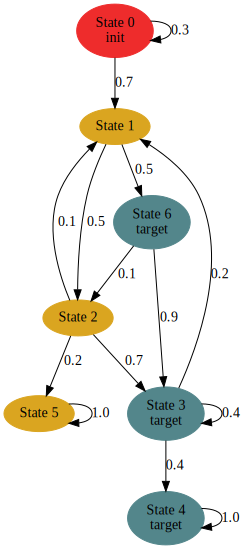

In [2]:
# create simple 7x7 transition matrix
P = dok_matrix((7,7))
P[0,0], P[0,1] = 0.3, 0.7
P[1,2], P[1,6] = 0.5, 0.5
P[2,1], P[2,3], P[2,5] = 0.1, 0.7, 0.2
P[3,1], P[3,3], P[3,4] = 0.2, 0.4, 0.4
P[4,4] = 1
P[5,5] = 1
P[6,3], P[6,2] = 0.9, 0.1

# create the markov chain
labels = {    "target" : set({3,4,6}),
              "init" : set({0}) }

mc = DTMC(P, labels)
mc.digraph()

{0: 0, 1: 1, 2: 2, 3: 3, 4: 5, 5: 6, 6: 4}


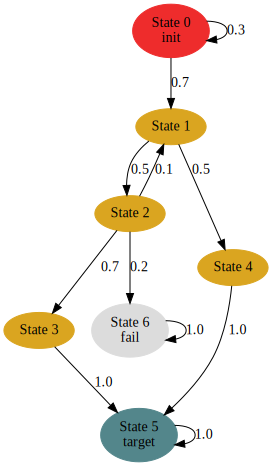

In [3]:
reachability_form, mapping = mc.reachability_form("init", "target")
print(mapping)
mcr = DTMC.from_reachability_form(reachability_form)
mcr.digraph()

saved at datasets/toy.tra, datasets/toy.lab


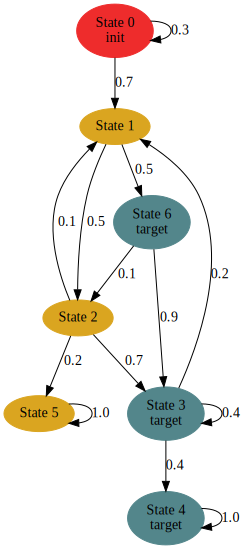

In [4]:
tra_path, lab_path = mc.save("datasets/toy")
print("saved at %s, %s" % (tra_path, lab_path))
mc_loaded = DTMC.from_file(lab_path, tra_path)
mc_loaded.digraph()

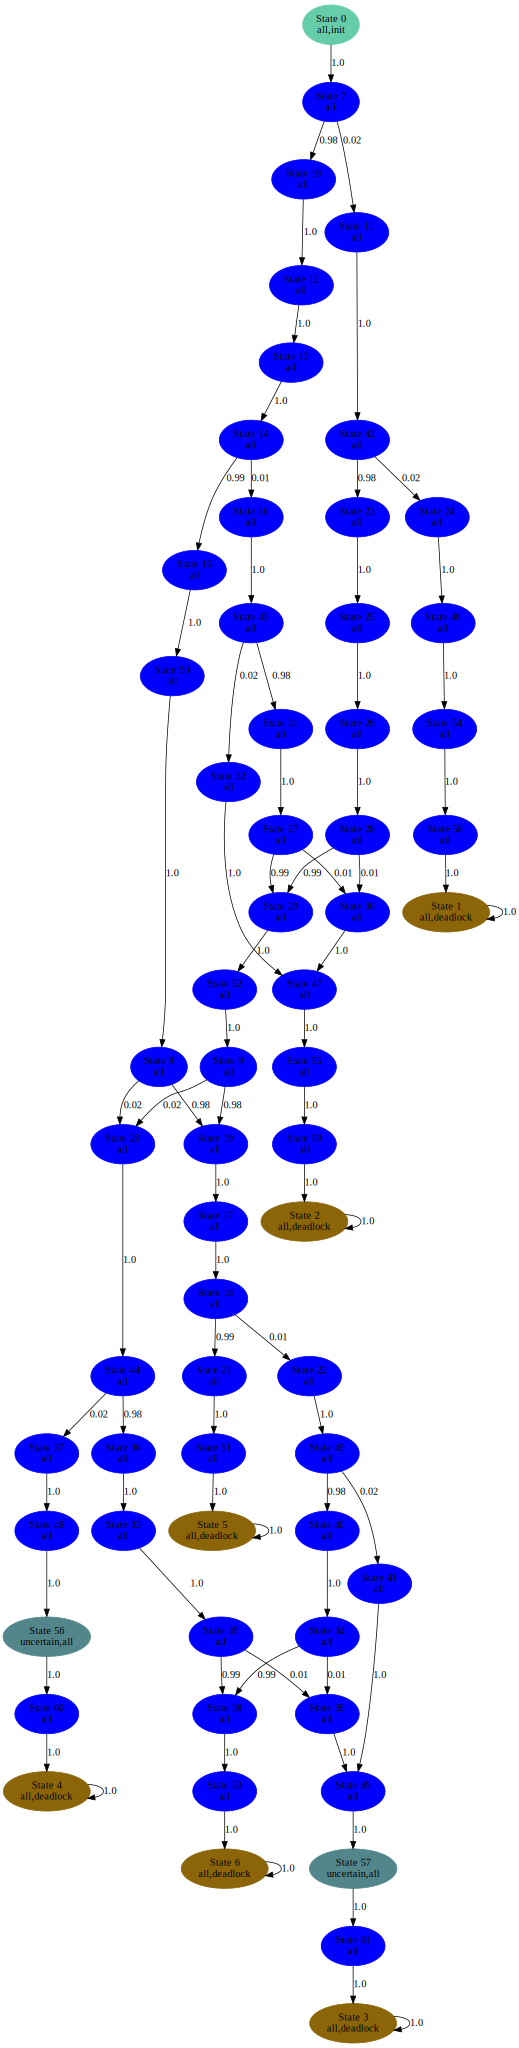

In [5]:
M = DTMC.from_prism_model("datasets/brp.pm",
                          prism_constants={("N",2),("MAX",1)},
                          extra_labels={("uncertain","s=5 & srep=2"),("all","true")})
M.digraph()